# 岩波DS Vol.1「PythonのMCMCライブラリPyMC」を追ってみる
- Y.Nakahashi
- 2018/1/26

線形回帰は飛ばして、階層ベイズモデルから。

#### ライブラリの読み込み

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

getcwd()を試したかったのでosを`import`してみる。

In [16]:
import os
os.getcwd()

'/Users/nakahashi/Desktop/Git/Python/Script'

北大の久保先生のサンプルデータを読み込む。元データは[こちら](http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/hbm/data7a.csv)から。

In [17]:
data = pd.read_csv("../Data/Iwanami_Kubo_data7a.csv")
data.head(3)

,id,y
0,1,0
1,2,2
2,3,7


<Container object of 9 artists>

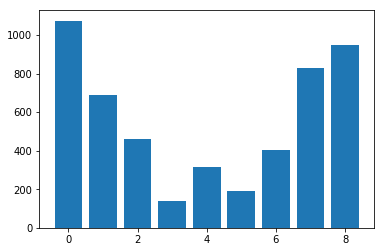

In [20]:
plt.bar(range(9), data.groupby('y').sum().id)

In [21]:
data.groupby('y').sum().T

y,0,1,2,3,4,5,6,7,8
id,1074,691,459,137,315,192,402,830,950


In [27]:
import numpy as np
import pymc as pm
# import theano.tensor as T # エラーが出る。theanoはexp()に使うようなのでnpで代替できるはず

In [29]:
def invlogt(v):
    return np.exp(v) / (np.exp(v) + 1)

### 以下でエラー。。。。。
with pm.Model() as model_hier:
    s    = pm.Uniform('s', 0, 1.0E+2)
    beta = pm.Normal('beta', 0, 1.0E+2)
    r    = pm.Normal('r', 0, s, shape = len(Y))
    q    = invlogit(beta + r)
    y    = pm.Binomial('y', 8, q, observed = Y)
    
    step = pm.Slicer([s, beta, r])
    trace_hier = pm.Sampler(10000, step)

/anaconda3/lib/python3.6/site-packages/pymc/Model.py:94: UserWarning: The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).
  'The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).')


AttributeError: __enter__